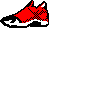

In [10]:
from PIL import Image, ImageDraw, ImageFont, ImageFilter, ImageColor, ImageMath, ImageOps
import os

width=100
height=100

red_image = Image.new('1', (width, height), 255)  # 255: clear the frame
red_draw = ImageDraw.Draw(red_image)
with Image.open("sneaker-red.png") as im:
    red_image.paste(im, (0,0))
black_image = Image.new('1', (width, height), 255)  # 255: clear the frame
black_draw = ImageDraw.Draw(black_image)
with Image.open("sneaker-black.png") as im:
    black_image.paste(im, (0,0))

def join_image(source_red:Image, source_black:Image):
    red_rgb = ImageMath.eval("convert(a,'RGB')", a=source_red)
    red_mask, _, _ = red_rgb.split()
    red_inverted = ImageOps.invert(red_rgb)
    red_r,red_g,red_b = red_inverted.split()
    #zero = ImageMath.eval("convert(band ^ band,'L')", band=red_g)

    black_r, black_g, black_b = (ImageMath.eval("convert(img,'RGB')", img=source_black)).split()

    out_r = ImageMath.eval("convert(red | black, 'L')", red=red_r, black=black_r, red_mask=red_mask)
    out_b = ImageMath.eval("convert((black & red_mask), 'L')", red=red_b, black=black_b, red_mask=red_mask)
    out_g = ImageMath.eval("convert((black & red_mask), 'L')", red=red_g, black=black_g, red_mask=red_mask)

    out = Image.merge("RGB", (out_r,out_b,out_g))
    return out
image = join_image(source_red=red_image, source_black=black_image)

from IPython import display
display.display(display.Image(filename='sneaker-red.png'))
display.display(display.Image(filename='sneaker-black.png'))
display.display(image)